# Descriptive Analysis

In [1]:
# Importing all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Importing data
df = pd.read_csv('../Data/cleaned_fetal_health.csv')
df.head()

# separating features and target variable
X = df.drop('fetal_health', axis=1)
y = df['fetal_health']

### Summary Statistics

In [25]:
# Descriptive statistics to get well-rounded view of the data 
ds = X.describe().T.round(4)
# Adding range column to descriptive statistics table
ds['range'] = ds['max'] - ds['min']
# Print out 
ds

,count,mean,std,min,25%,50%,75%,max,range
baseline_value,2126.0,133.3039,9.8408,106.0,126.000,133.000,140.000,160.000,54.000
accelerations,2126.0,0.0032,0.0039,0.0,0.000,0.002,0.006,0.019,0.019
fetal_movement,2126.0,0.0095,0.0467,0.0,0.000,0.000,0.003,0.481,0.481
uterine_contractions,2126.0,0.0044,0.0029,0.0,0.002,0.004,0.007,0.015,0.015
light_decelerations,2126.0,0.0019,0.0030,0.0,0.000,0.000,0.003,0.015,0.015
severe_decelerations,2126.0,0.0000,0.0001,0.0,0.000,0.000,0.000,0.001,0.001
prolongued_decelerations,2126.0,0.0002,0.0006,0.0,0.000,0.000,0.000,0.005,0.005
abnormal_short_term_variability,2126.0,46.9901,17.1928,12.0,32.000,49.000,61.000,87.000,75.000
mean_value_of_short_term_variability,2126.0,1.3328,0.8832,0.2,0.700,1.200,1.700,7.000,6.800
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.8467,18.3969,0.0,0.000,0.000,11.000,91.000,91.000


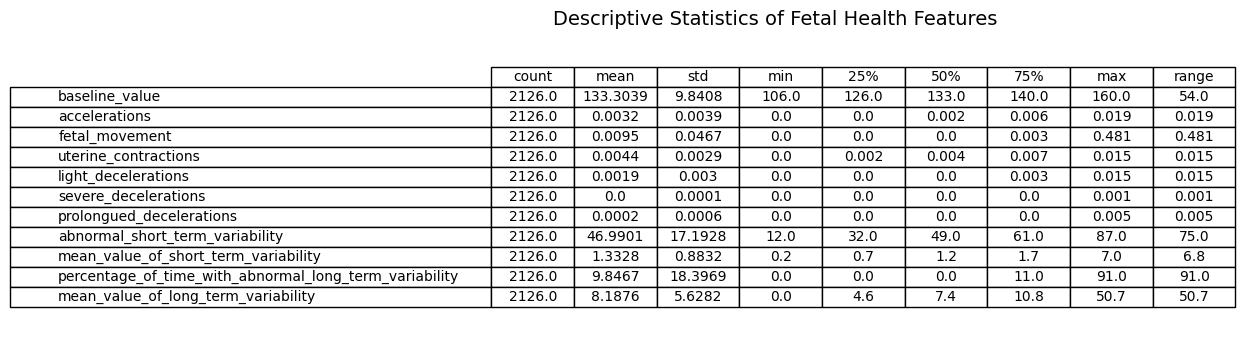

In [36]:
# Create matplotlib figure from ds so can save as image
fig, ax = plt.subplots(figsize=(8, 4))
# Want to hide axes 
ax.axis('off')

# Create table from dataframe 
table = ax.table(
    cellText=ds.values, 
    colLabels=ds.columns,
    rowLabels=ds.index,
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title('Descriptive Statistics of Fetal Health Features', fontsize=14, loc='left')

# Save table as PNG
plt.savefig('../Outputs/descriptive_stats_table.png', bbox_inches='tight', dpi=300)
plt.show() 

### Exploratory visualizations

Histograms to show distribution for all features

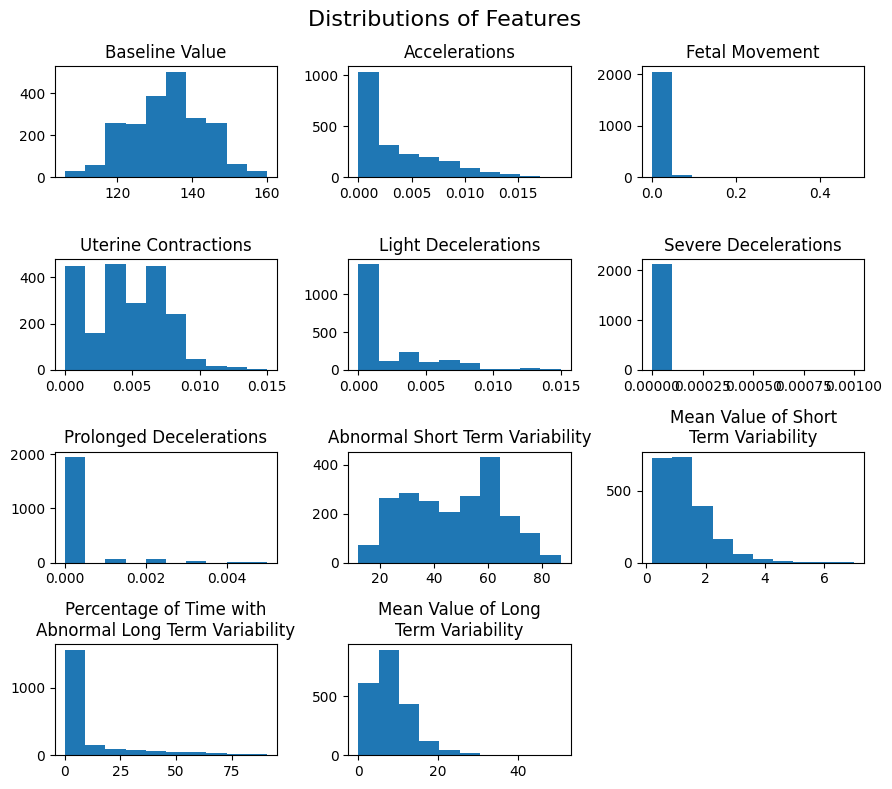

In [63]:
# Histograms showing distribution for each feature 
fig, ax = plt.subplots(4, 3, figsize=(9, 8))
# Flatten ax array for easy indexing 
ax = ax.flatten()

# Plot histograms for each feature and add title
ax[0].hist(X['baseline_value'])
ax[0].set_title('Baseline Value')

ax[1].hist(X['accelerations'])
ax[1].set_title('Accelerations')

ax[2].hist(X['fetal_movement'])
ax[2].set_title('Fetal Movement')

ax[3].hist(X['uterine_contractions'])
ax[3].set_title('Uterine Contractions')

ax[4].hist(X['light_decelerations'])
ax[4].set_title('Light Decelerations')

ax[5].hist(X['severe_decelerations'])
ax[5].set_title('Severe Decelerations')

ax[6].hist(X['prolongued_decelerations'])
ax[6].set_title('Prolonged Decelerations') 

ax[7].hist(X['abnormal_short_term_variability'])
ax[7].set_title('Abnormal Short Term Variability')

ax[8].hist(X['mean_value_of_short_term_variability'])
ax[8].set_title('Mean Value of Short\nTerm Variability')

ax[9].hist(X['percentage_of_time_with_abnormal_long_term_variability'])
ax[9].set_title('Percentage of Time with\nAbnormal Long Term Variability')

ax[10].hist(X['mean_value_of_long_term_variability'])
ax[10].set_title('Mean Value of Long\nTerm Variability')

# Delete last, empty plot space
fig.delaxes(ax[11])

# Adjusting layout to leave more space for titles
fig.subplots_adjust(hspace=0.8, wspace=0.4)

# Create one overall title for the figure
fig.suptitle('Distributions of Features', fontsize=16) 

# Saving histograms as PNG
plt.savefig('../Outputs/feature_histograms.png', dpi=300)

plt.tight_layout()
plt.show()

Looking more in-depth at the distribution of `baseline_value`, `uterine_contractions` and `abnormal_short_term_variability` because these are the variables that seem to have the biggest variation in their distribution, based on the histograms above. We chose to use violinplots because they show the distribution of the data, as well as the density at different values. We included quartiles ranges within the violinplots to give more context to the distribution. Additionally, we separated the plots by `fetal_health` to show differences of the features across the different classes.

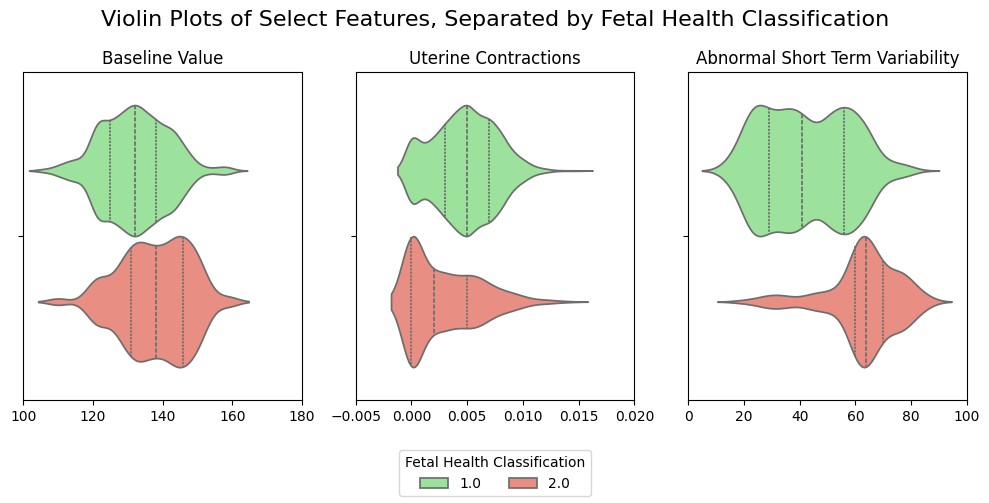

In [55]:
# Violinplots for baseline_value, uterine_contractions, and abnormal_short_term_variability
fig, ax = plt.subplots(1, 3, figsize=(10, 5))

# Create custom palette to represent the fetal health classes
palette={1: "lightgreen", 2: "salmon"}

# Features to make violin plots for 
cols = {'Baseline Value': X['baseline_value'],
        'Uterine Contractions': X['uterine_contractions'],
        'Abnormal Short Term Variability': X['abnormal_short_term_variability']}

# Initialize index for ax
i = 0

# For loop to create violin plots for each selected feature
for c in cols:
    # Violinplot, separated by fetal health classification
    sns.violinplot(x=cols[c], hue=y, palette=palette, inner='quartile', ax=ax[i])
    # Add title, which is just feature name 
    ax[i].set_title(c)
    # Remove individual legends
    ax[i].legend_.remove() 
    # Remove x labels
    ax[i].set_xlabel('')
    # Increment index for ax 
    i += 1

# Adjust individual x axis limits
ax[0].set_xlim(100, 180)
ax[1].set_xlim(-0.005, 0.02)
ax[2].set_xlim(0, 100)

# Create one overall title
fig.suptitle('Violin Plots of Select Features, Separated by Fetal Health Classification', fontsize=16) 

# Tight layout 
plt.tight_layout() 

# Create shared legend for fetal health classes
plt.subplots_adjust(bottom=0.2)
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2, title='Fetal Health Classification')

# Saving violin plots as PNG
plt.savefig('../Outputs/violin_plots.png', dpi=300)

plt.show() 

In [5]:
print(f"Y shape: {y.shape}\n")
print(y)

Y shape: (2126,)

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64


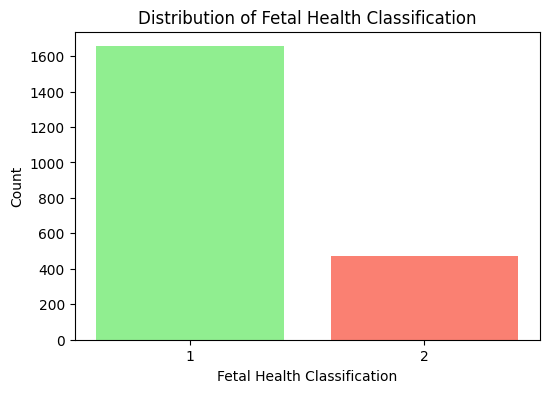

In [52]:
# Histogram for fetal health
plt.figure(figsize=(6,4))
# Create counts to count number of times 1 or 2 appears 
counts = y.value_counts().sort_index()

# Create custom palette to represent the fetal health classes
palette={1: "lightgreen", 2: "salmon"}

# Create bar chart using counts 
plt.bar(counts.index, counts.values, color=palette.values())

# Create x-ticks for 1 or 2 
plt.xticks(counts.index)

# Add title and axis labels 
plt.title('Distribution of Fetal Health Classification')
plt.xlabel('Fetal Health Classification')
plt.ylabel('Count')

# Saving fetal health histogram as PNG
plt.savefig('../Outputs/fetal_health_distribution.png', dpi=300)

plt.show()

Scatterplots to show relationships between each feature and target variable

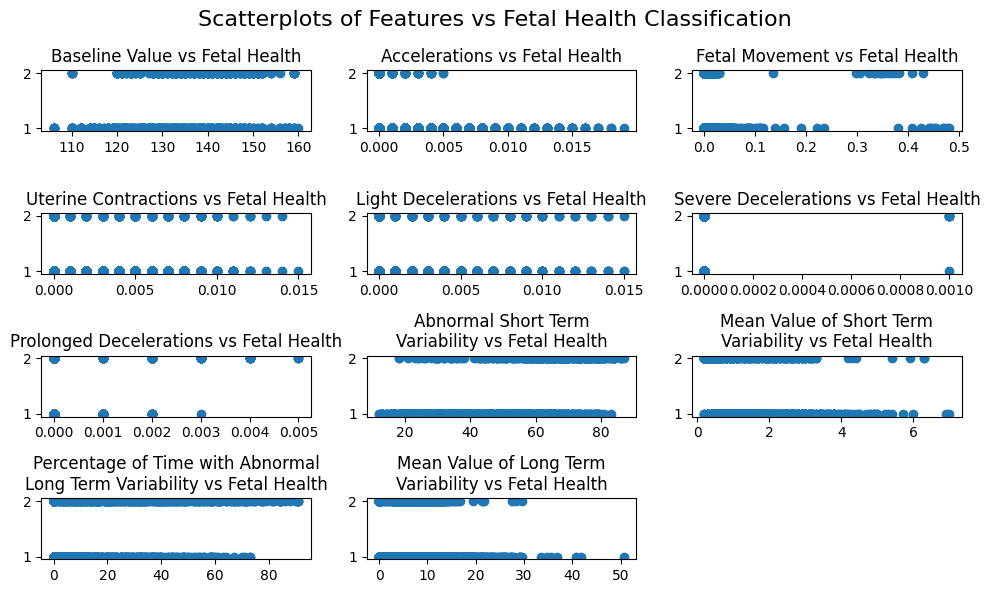

In [54]:
# Scatterplot comparing all variables to target variable 
fig, ax = plt.subplots(4, 3, figsize=(10, 6))
# Flatten ax array for easy indexing
ax = ax.flatten()

# Plot scatterplots for each feature and add title
ax[0].scatter(X['baseline_value'], y)
ax[0].set_title('Baseline Value vs Fetal Health')

ax[1].scatter(X['accelerations'], y)
ax[1].set_title('Accelerations vs Fetal Health')

ax[2].scatter(X['fetal_movement'], y)
ax[2].set_title('Fetal Movement vs Fetal Health')

ax[3].scatter(X['uterine_contractions'], y)
ax[3].set_title('Uterine Contractions vs Fetal Health')

ax[4].scatter(X['light_decelerations'], y)
ax[4].set_title('Light Decelerations vs Fetal Health')

ax[5].scatter(X['severe_decelerations'], y)
ax[5].set_title('Severe Decelerations vs Fetal Health')

ax[6].scatter(X['prolongued_decelerations'], y)
ax[6].set_title('Prolonged Decelerations vs Fetal Health') 

ax[7].scatter(X['abnormal_short_term_variability'], y)
ax[7].set_title('Abnormal Short Term\nVariability vs Fetal Health')

ax[8].scatter(X['mean_value_of_short_term_variability'], y)
ax[8].set_title('Mean Value of Short Term\nVariability vs Fetal Health')

ax[9].scatter(X['percentage_of_time_with_abnormal_long_term_variability'], y)
ax[9].set_title('Percentage of Time with Abnormal\nLong Term Variability vs Fetal Health')

ax[10].scatter(X['mean_value_of_long_term_variability'], y)
ax[10].set_title('Mean Value of Long Term\nVariability vs Fetal Health')

# Delete last, empty plot space
fig.delaxes(ax[11])

# Create overall title 
fig.suptitle('Scatterplots of Features vs Fetal Health Classification', fontsize=16) 

plt.tight_layout()

# Saving scatterplots as PNG
plt.savefig('../Outputs/comparison_scatterplots.png', dpi=300)
plt.show()

Heatmap to show correlations between features

Dont need to do pca bc no multicollinearity. almost none are related. point out 0.56 

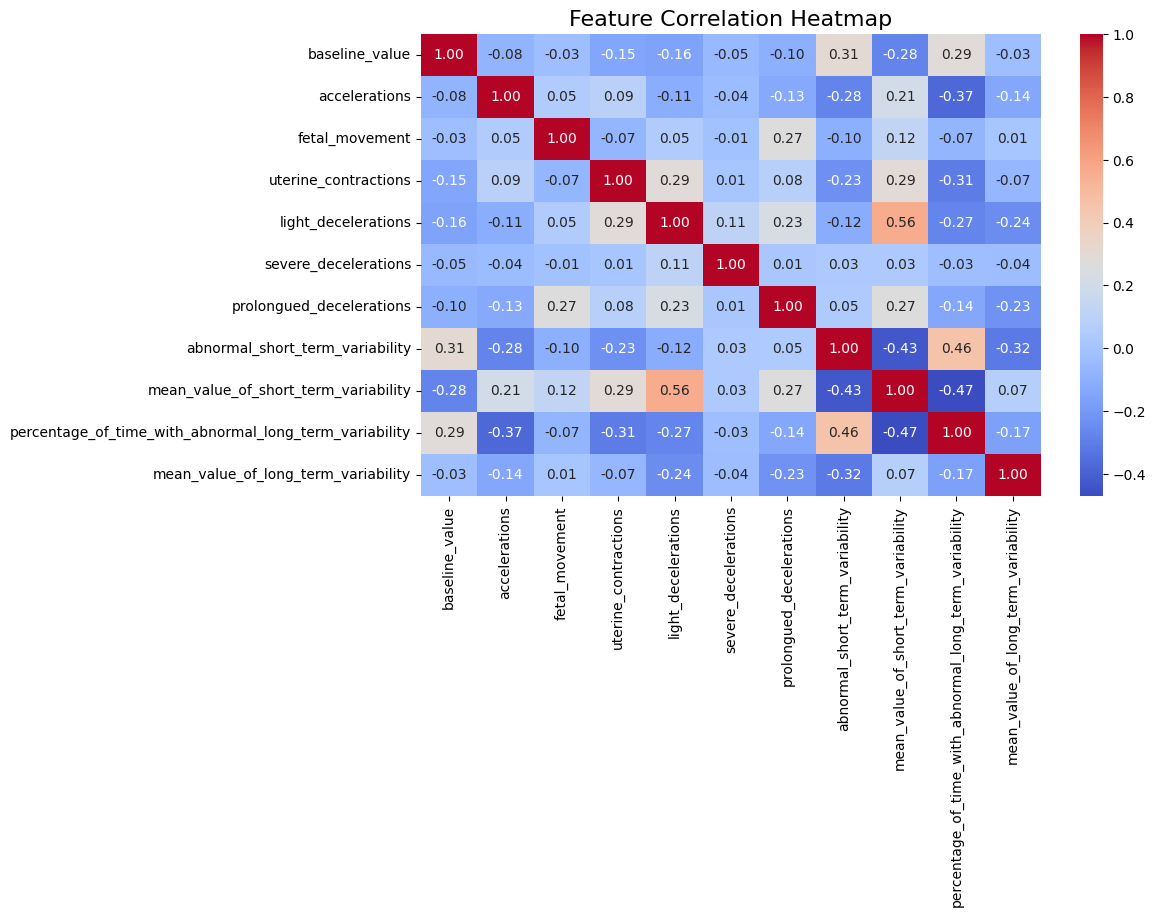

In [56]:
# Heatmap to show correlation between features
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()